## Dispersion relation (2)

$$\hat{\omega}^3(2-\Lambda_0) - \hat{\omega}^2 \Lambda_0(k_y \lambda_i)\left(\frac{T_e}{T_i}\right)^{-1}\left(\frac{L_n}{\lambda_i}\right)^{-1} + \frac{3}{2}\hat{\omega}^2 \Lambda_0 (k_y \lambda_i)\left(\frac{T_e}{T_i}\right)^{-1}\left(\frac{L_T}{\lambda_i}\right)^{-1}+\hat{\omega}^2 \xi_i \Lambda_1(k_y \lambda_i)\left(\frac{T_e}{T_i}\right)^{-1}\left(\frac{L_T}{\lambda_i}\right)^{-1} - \hat{\omega}^2 \Lambda_0(k_y \lambda_i)\left(\frac{T_e}{T_i}\right)^{-1}\left(\frac{L_T}{\lambda_i}\right)^{-1}-\hat{\omega}\Lambda_0(k_z \lambda_i)^2- \Lambda_0(k_y\lambda_i)\left(\frac{T_e}{T_i}\right)^{-1}\left(\frac{L_n}{\lambda_i}\right)^{-1} (k_z \lambda_i)^2 +\Lambda_0 (k_y \lambda_i)\left(\frac{T_e}{T_i}\right)^{-1}\left(\frac{L_T}{\lambda_i}\right)^{-1}(k_z \lambda_i)^2+\xi_i \Lambda_1 (k_y \lambda_i)\left(\frac{T_e}{T_i}\right)^{-1}\left(\frac{L_T}{\lambda_i}\right)^{-1}(k_z \lambda_i)^2 - \xi_i \Lambda_0 (k_y \lambda_i)\left(\frac{T_e}{T_i}\right)^{-1}\left(\frac{L_T}{\lambda_i}\right)^{-1}(k_z \lambda_i)^2 = 0$$

In [27]:

# define a function for the dispersion relation
def dispersion_relation(x, k_z_lambda):
    # x = omega/Omega_i (normalised complex frequency)
    
    # set the parameters
    k_y_lambda = 0.1 # k_y * lambda_i
    L_n_lambda = 10**5 # L_n/lambda_i
    L_T_lambda = 10 # L_T/lambda_i
    temp_ratio = 10 # T_e/T_i
    bessel_0 = special.ive(0, k_y_lambda**2) # order 0 bessel function
    bessel_1 = special.ive(1, k_y_lambda**2) # order 1 bessel function
    
    omega_t = temp_ratio**(-1) * k_y_lambda * L_T_lambda**(-1)
    omega_n = k_y_lambda * L_n_lambda**(-1)
    
    # return the expression for the dispersion relation
    return x**3 * (2-bessel_0) - x**2 *bessel_0 * omega_n + 3/2 *x**2 * bessel_0*omega_t + x**2 *k_y_lambda**2 * bessel_1 *omega_t -x**2 *k_y_lambda*bessel_0 * omega_t - x *bessel_0 *k_z_lambda**2 - temp_ratio**(-1) * bessel_0 * omega_n * k_z_lambda**2 + bessel_0 * omega_t * k_z_lambda**2 + k_y_lambda**2 * bessel_1 * omega_t * k_z_lambda**2 - k_y_lambda**2 * bessel_0 * omega_t * k_z_lambda**2

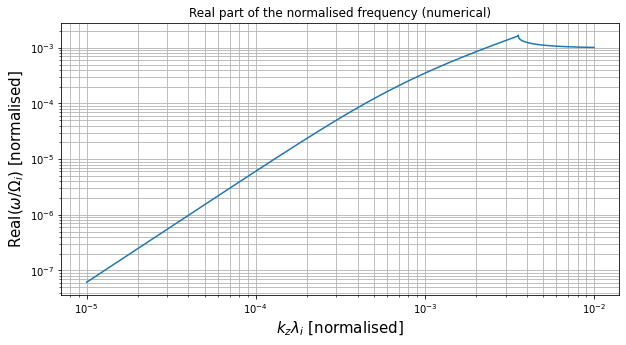

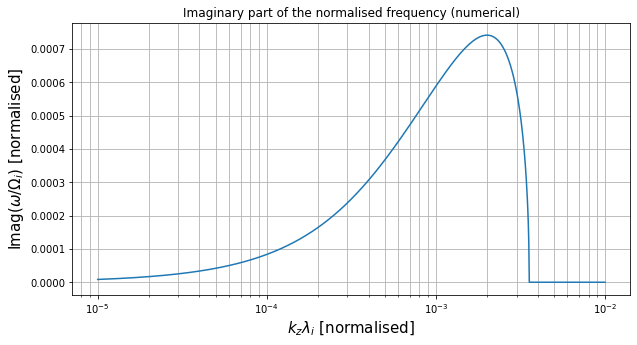

In [26]:
import numpy as np
from scipy import optimize, special

# define values for k_z * lambda_i
k_z_lambda = np.logspace(-5, -2, 1000)
# turn it to python list for the indexing in the loop
# it's easier compared to the numpy array

k_z_lambda_list = k_z_lambda.tolist() 

omega_numerical = [] # list to keep the root

# first loop for the first results
for i in k_z_lambda_list[:10]:
    # find the root
    solution = optimize.root_scalar(dispersion_relation, x0 = 0.0001+0.0001j, 
                                     x1 = 0.001+0.001j, args=i, method='secant')
    # save the root
    omega_numerical.append(solution.root)
    
    #print(k_z_lambda_list.index(i))

# big loop that uses as guesses the previous roots
for i in k_z_lambda_list[10:1000]:
    
    # add some noise to the roots for the guesses
    guess_0 = omega_numerical[k_z_lambda_list.index(i)-1] - omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    guess_1 = omega_numerical[k_z_lambda_list.index(i)-1] + omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    # calculate root
    solution = optimize.root_scalar(dispersion_relation, x0 = guess_0, 
                                    x1 = guess_1, args=i, method='secant')
    # save root
    omega_numerical.append(solution.root)
    
import matplotlib.pyplot as plt

# turn it into a numpy array again
omega_numerical = np.asarray(omega_numerical)

# plot frequency
plt.subplots(figsize=(10,5))

# plot real part for both roots
plt.plot(k_z_lambda, omega_numerical.real)

# fix the plot label's etc
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")

plt.show()

# plot imaginary part for both roots
plt.subplots(figsize=(10,5))

plt.plot(k_z_lambda, omega_numerical.imag)

plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.show()

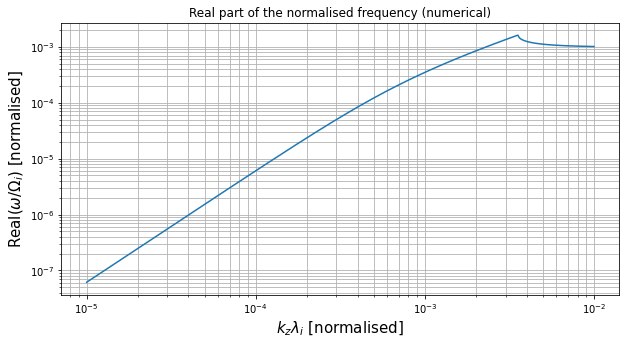

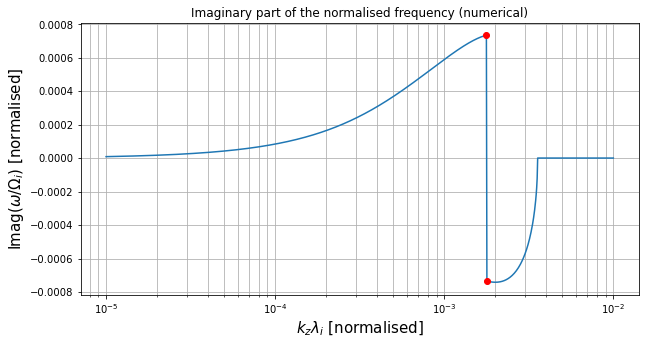

In [31]:
import numpy as np
from scipy import optimize
from scipy import special

# define values for k_z * lambda_i
k_z_lambda = np.logspace(-5, -2, 1000)
# turn it to python list for the indexing in the loop
# it's easier compared to the numpy array

k_z_lambda_list = k_z_lambda.tolist() 

omega_numerical = [] # list to keep the root

# first loop for the first results
for i in k_z_lambda_list[:10]:
    # find the root
    solution = optimize.root_scalar(dispersion_relation, x0 = 0.000001+0.0001j, 
                                     x1 = 0.000002+0.001j, args=i, method='secant')
    # save the root
    omega_numerical.append(solution.root)
    
    #print(k_z_lambda_list.index(i))

# big loop that uses as guesses the previous roots
for i in k_z_lambda_list[10:750]:
    
    # add some noise to the roots for the guesses
    guess_0 = omega_numerical[k_z_lambda_list.index(i)-1] - omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    guess_1 = omega_numerical[k_z_lambda_list.index(i)-1] + omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    # calculate root
    solution = optimize.root_scalar(dispersion_relation, x0 = guess_0, 
                                    x1 = guess_1, args=i, method='secant')
    # save root
    omega_numerical.append(solution.root)    

# loop to find the negative values
for i in k_z_lambda_list[750:1000]:

    solution = optimize.root_scalar(dispersion_relation, x0 = 0.00001 - 0.001j, 
                                   x1 = 0.0001 - 0.002j, args=i, method='secant')
    
    omega_numerical.append(solution.root)

    
import matplotlib.pyplot as plt

# turn it into a numpy array again
omega_numerical = np.asarray(omega_numerical)

# plot frequency
plt.subplots(figsize=(10,5))


# plot real part for both roots
plt.plot(k_z_lambda, omega_numerical.real)

# fix the plot label's etc
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")

plt.show()

# plot imaginary part for both roots
plt.subplots(figsize=(10,5))

plt.plot(k_z_lambda, omega_numerical.imag)
plt.plot(k_z_lambda[749], omega_numerical[749].imag, 'ro')
plt.plot(k_z_lambda[750], omega_numerical[750].imag, 'ro')

plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.show()

## Dispersion relation (3)

$$-\hat{\omega}^2W\Lambda_0 (k_y \lambda_i)\left(\frac{T_e}{T_i}\right)^{-1}\left(\frac{L_T}{\lambda_i}\right)^{-1} + 2\hat{\omega}(2 + W\Lambda_0-\Lambda_0)(k_z \lambda_i)^2+2W\Lambda_0(k_y \lambda_i) \left(\frac{T_e}{T_i}\right)^{-1}\left(\frac{L_n}{\lambda_i}\right)^{-1}(k_z \lambda_i)^2 -2\Lambda_0(k_y \lambda_i) \left(\frac{T_e}{T_i}\right)^{-1}\left(\frac{L_n}{\lambda_i}\right)^{-1}(k_z \lambda_i)^2+2W\Lambda_0 (k_y \lambda_i)\left(\frac{T_e}{T_i}\right)^{-1}\left(\frac{L_T}{\lambda_i}\right)^{-1}(k_z \lambda_i)^2 -2\Lambda_0 (k_y \lambda_i)\left(\frac{T_e}{T_i}\right)^{-1}\left(\frac{L_T}{\lambda_i}\right)^{-1}(k_z \lambda_i)^2+2W\Lambda_0 (k_y \lambda_i)^3\left(\frac{T_e}{T_i}\right)^{-1}\left(\frac{L_T}{\lambda_i}\right)^{-1}(k_z \lambda_i)^2 -2\Lambda_0 (k_y \lambda_i)^3\left(\frac{T_e}{T_i}\right)^{-1}\left(\frac{L_T}{\lambda_i}\right)^{-1}(k_z \lambda_i)^2 = 0$$

In [1]:
# define a function for the dispersion relation
def dispersion_relation(x, k_z_lambda):
    # x = omega/Omega_i (normalised complex frequency)
    
    # set the parameters
    k_y_lambda = 0.1 # k_y * lambda_i
    L_n_lambda = 10**5 # L_n/lambda_i
    L_T_lambda = 10 # L_T/lambda_i
    temp_ratio = 10 # T_e/T_i
    bessel = special.ive(0, k_y_lambda**2) # order 0 bessel function
    W = special.wofz(x/k_z_lambda) # dispersion function 

    omega_t = temp_ratio**(-1) * k_y_lambda * L_T_lambda**(-1)
    omega_n = k_y_lambda * L_n_lambda**(-1)
    
    # return the expression for the dispersion relation
    return -x**2 *omega_t * W * bessel + 2 * x *k_z_lambda**2 *(2 + W*bessel-bessel) + 2*temp_ratio**(-1)*omega_n*k_z_lambda**2 *W*bessel - 2*temp_ratio**(-1)*omega_n*k_z_lambda**2 *bessel + 2*omega_t *k_z_lambda**2 *W*bessel - 2*omega_t *k_z_lambda**2 *bessel + 2*omega_t *k_z_lambda**2 *k_y_lambda**2 *W*bessel - 2*omega_t *k_z_lambda**2 *k_y_lambda**2 *bessel

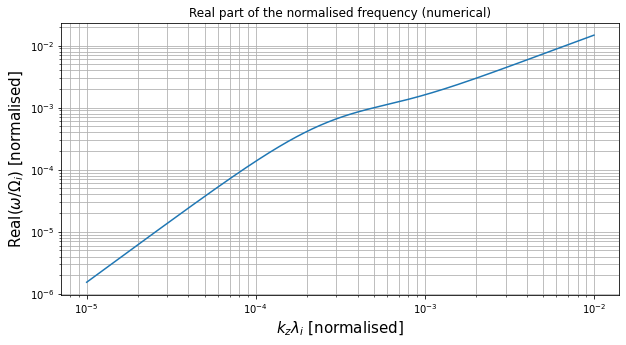

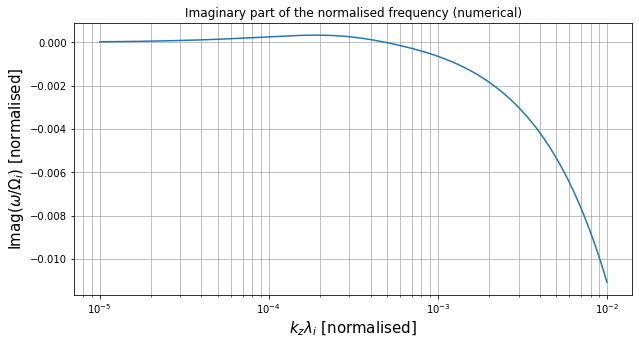

In [8]:
# import packages
import numpy as np
from scipy import optimize
from scipy import special

# define values for k_z * lambda_i
k_z_lambda = np.logspace(-5, -2, 1000)
# turn it to python list for the indexing in the loop
# it's easier compared to the numpy array
k_z_lambda_list = k_z_lambda.tolist() 

omega_numerical = [] # list to keep the root

# first loop for the first results
for i in k_z_lambda_list[:50]:
    # find the root
    solution = optimize.root_scalar(dispersion_relation, x0 = 0.001+0.001j, 
                                     x1 = 0.002+0.002j, args=i, method='secant')
    # save the root
    omega_numerical.append(solution.root)
    
    #print(k_z_lambda_list.index(i))

# big loop that uses as guesses the previous roots
for i in k_z_lambda_list[50:1000]:
    
    # add some noise to the roots for the guesses
    guess_0 = omega_numerical[k_z_lambda_list.index(i)-1] + omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    guess_1 = omega_numerical[k_z_lambda_list.index(i)-1] - omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    # calculate root
    solution = optimize.root_scalar(dispersion_relation, x0 = guess_0, 
                                    x1 = guess_1, args=i, method='secant')
    # save root
    omega_numerical.append(solution.root)

    
import matplotlib.pyplot as plt

# turn it into a numpy array again
omega_numerical = np.asarray(omega_numerical)

# plot frequency
plt.subplots(figsize=(10,5))

# plot real part for both roots
plt.plot(k_z_lambda_list, omega_numerical.real)

# fix the plot label's etc
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")

plt.show()

# plot imaginary part for both roots
plt.subplots(figsize=(10,5))

plt.plot(k_z_lambda_list, omega_numerical.imag)

plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.show()

C:\Users\xrist\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


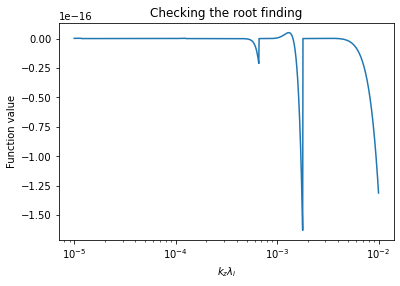

In [9]:
# turn it back to numpy array
omega_numerical = np.asarray(omega_numerical)

# calculate the function's value
function_value = dispersion_relation(omega_numerical, k_z_lambda)

plt.plot(k_z_lambda, function_value)
plt.xlabel('$k_z \lambda_i$')
plt.ylabel('Function value')
plt.title('Checking the root finding')
plt.xscale('log')
plt.show()

In [ ]:
from scipy import optimize
import numpy as np

omega_1_numerical = [] # list for the first root
omega_2_numerical = [] # list for the second root

# define values for k_z * lambda_i
k_z_lambda = np.logspace(-5,-2,1000)

for i in k_z_lambda:
    
    # calculate first root
    solution_1 = optimize.root_scalar(dispersion_relation, x0 = 0.0001, 
                                      x1 = 0.0002, args=i, method='secant')
    # save first root
    omega_1_numerical.append(solution_1.root)
    
    # calculate second root
    solution_2 = optimize.root_scalar(dispersion_relation, x0 = 0.0001+0.001j, 
                                      x1 = 0.002+0.001j, args=i, method='secant')
   # save second root
    omega_2_numerical.append(solution_2.root)
    
import matplotlib.pyplot as plt

# turn the lists into numpy arrays
omega_1_numerical = np.asarray(omega_1_numerical)
omega_2_numerical = np.asarray(omega_2_numerical)
# plot frequency

plt.subplots(figsize=(10,5))

# plot real part for both roots
plt.plot(k_z_lambda, omega_1_numerical.real, label='root 1') # plot root 1
plt.plot(k_z_lambda, omega_2_numerical.real, label='root 2') # plot root 2

# fix the plot label's etc
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()

# plot imaginary part for both roots

plt.subplots(figsize=(10,5))

plt.plot(k_z_lambda, omega_1_numerical.imag, label='root 1') # plot root 1
plt.plot(k_z_lambda, omega_2_numerical.imag, label='root 2') # plot root 2


plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()

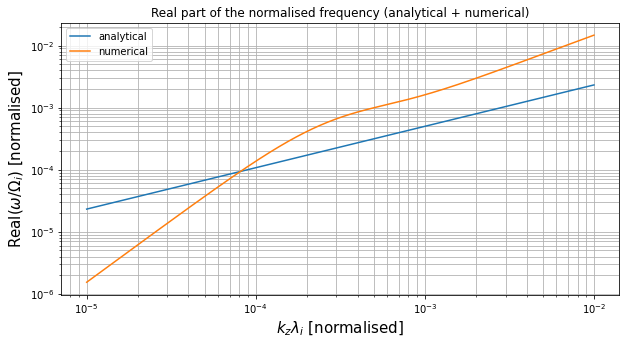

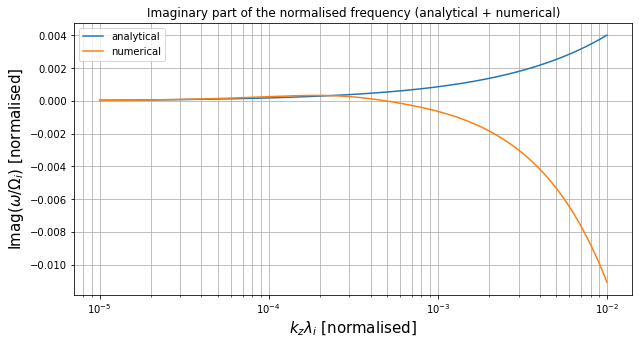

In [10]:
# normalised solution for the ITG
# plots real part and imaginary part of frequency 
# for both analytical and numerical solution

# set parameters
k_y_lambda = 0.1 # k_y * lambda_i
L_T_lambda = 10 # L_T / lambda_i 
k_z_lambda = np.logspace(-5, -2, 1000) # k_z * lambda_i
temp_ratio = 10

# calculate omega analytical
omega_analytical = (1/2 - np.sqrt(3)/2j)*np.absolute(k_y_lambda**(1/3) * 
                                          L_T_lambda**(-1/3) * 
                                          temp_ratio**(-1/3) * 
                                          (k_z_lambda)**(2/3))


# plot frequency
plt.subplots(figsize=(10,5))

# plot real part - both analytical and numerical
plt.plot(k_z_lambda, omega_analytical.real, label='analytical')
plt.plot(k_z_lambda, omega_numerical.real, label='numerical')
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (analytical + numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()

# plot imaginary part - both analytical and numerical
plt.subplots(figsize=(10,5))
plt.plot(k_z_lambda, omega_analytical.imag, label='analytical')
plt.plot(k_z_lambda, omega_numerical.imag, label='numerical')
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (analytical + numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()

## Dispersion relation (4)

In [1]:
# define a function for the dispersion relation
def dispersion_relation(x, k_z_lambda):
    # x = omega/Omega_i (normalised complex frequency)
    
    # set the parameters
    k_y_lambda = 0.1 # k_y * lambda_i
    L_n_lambda = 10**5 # L_n/lambda_i
    L_T_lambda = 10 # L_T/lambda_i
    temp_ratio = 10 # T_e/T_i
    bessel_0 = special.ive(0, k_y_lambda**2) # order 0 bessel function
    bessel_1 = special.ive(1, k_y_lambda**2) # order 1 bessel function
    W = special.wofz(x/k_z_lambda) # dispersion function 

    omega_t = temp_ratio**(-1) * k_y_lambda * L_T_lambda**(-1)
    omega_n = k_y_lambda * L_n_lambda**(-1)
    
    # return the expression for the dispersion relation
    return -x**2 *omega_t *W*bessel_0 + 4*x*k_z_lambda**2 + 2*x*k_z_lambda**2 *W*bessel_0 - 2*x*k_z_lambda**2 *bessel_0 + omega_t*k_z_lambda**2 *W*bessel_0 - omega_t*k_z_lambda**2 *bessel_0 + 2*temp_ratio**(-1) *omega_n*k_z_lambda**2 *W *bessel_0 - 2*temp_ratio**(-1) *omega_n*k_z_lambda**2 *bessel_0 - 2*omega_t*k_z_lambda**2 *W*k_y_lambda**2 *bessel_1 - 2*omega_t *k_z_lambda**2 *W *k_y_lambda**2 *bessel_0 - 2*omega_t *k_z_lambda**2 *k_y_lambda**2 *bessel_1 - 2*omega_t *k_z_lambda**2 *k_y_lambda**2 *bessel_0

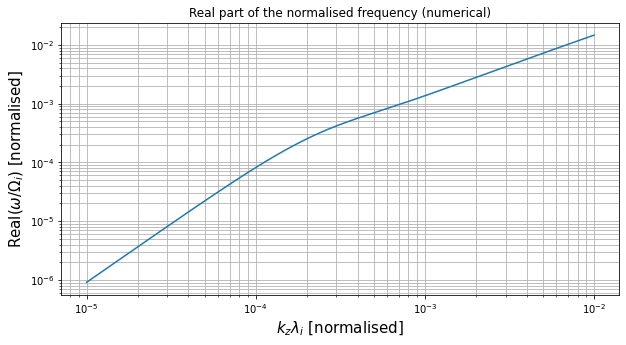

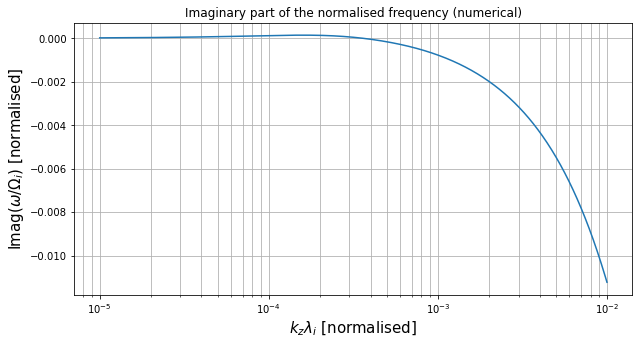

In [2]:
import numpy as np
from scipy import optimize
from scipy import special

# define values for k_z * lambda_i
k_z_lambda = np.logspace(-5, -2, 1000)
# turn it to python list for the indexing in the loop
# it's easier compared to the numpy array
k_z_lambda_list = k_z_lambda.tolist() 

omega_numerical = [] # list to keep the root

# first loop for the first results
for i in k_z_lambda_list[:50]:
    # find the root
    solution = optimize.root_scalar(dispersion_relation, x0 = 0.001+0.001j, 
                                     x1 = 0.002+0.002j, args=i, method='secant')
    # save the root
    omega_numerical.append(solution.root)
    
    #print(k_z_lambda_list.index(i))

# big loop that uses as guesses the previous roots
for i in k_z_lambda_list[50:1000]:
    
    # add some noise to the roots for the guesses
    guess_0 = omega_numerical[k_z_lambda_list.index(i)-1] + omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    guess_1 = omega_numerical[k_z_lambda_list.index(i)-1] - omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    # calculate root
    solution = optimize.root_scalar(dispersion_relation, x0 = guess_0, 
                                    x1 = guess_1, args=i, method='secant')
    # save root
    omega_numerical.append(solution.root)

    
import matplotlib.pyplot as plt

# turn it into a numpy array again
omega_numerical = np.asarray(omega_numerical)

# plot frequency
plt.subplots(figsize=(10,5))

# plot real part for both roots
plt.plot(k_z_lambda_list, omega_numerical.real)

# fix the plot label's etc
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")

plt.show()

# plot imaginary part for both roots
plt.subplots(figsize=(10,5))

plt.plot(k_z_lambda_list, omega_numerical.imag)

plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.show()